In [1]:
# Importing all the necessary libraries 

import os
import pandas as pd
import numpy as np
import datetime 
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# Reading the dataset

base_data = pd.read_csv('20222703 Causes Of Death Clean Output V2.0.csv')

In [3]:
# Filter out USA Data

us_data = base_data[base_data['Entity'] == 'United States']

In [13]:
# Prints the dataset

us_data

,Causes name,Causes Full Description,Death Numbers,Entity,Code,Year
191917,Protein-energy malnutrition,Deaths - Protein-energy malnutrition - Sex: Bo...,2419.0,United States,USA,1990
191902,Drug use disorders,Deaths - Drug use disorders - Sex: Both - Age:...,5865.0,United States,USA,1990
191907,Neonatal disorders,Deaths - Neonatal disorders - Sex: Both - Age:...,19306.0,United States,USA,1990
191906,Lower respiratory infections,Deaths - Lower respiratory infections - Sex: B...,72716.0,United States,USA,1990
191905,Maternal disorders,Deaths - Maternal disorders - Sex: Both - Age:...,538.0,United States,USA,1990
...,...,...,...,...,...,...
192540,Self-harm,Deaths - Self-harm - Sex: Both - Age: All Ages...,45349.0,United States,USA,2019
192539,Nutritional deficiencies,Deaths - Nutritional deficiencies - Sex: Both ...,6090.0,United States,USA,2019
192536,Exposure to forces of nature,Deaths - Exposure to forces of nature - Sex: B...,105.0,United States,USA,2019
192529,Drug use disorders,Deaths - Drug use disorders - Sex: Both - Age:...,65717.0,United States,USA,2019


In [5]:
# Drops any non numbers

us_data = us_data.dropna()

In [6]:
# Tells you how many rows and columns you have after the drops
us_data.shape

(967, 6)

In [7]:
# Gives you information about the United States dataframe
us_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 191565 to 192553
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Causes name              967 non-null    object 
 1   Causes Full Description  967 non-null    object 
 2   Death Numbers            967 non-null    float64
 3   Entity                   967 non-null    object 
 4   Code                     967 non-null    object 
 5   Year                     967 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 52.9+ KB


In [12]:
# Prints the number of deaths that occurred each year in the United States

print(us_data[['Death Numbers', 'Year']].to_string(index=False))

# The Year Column is actually not grouped correctly via Year so this will group it ascending 
us_data = us_data.sort_values('Year')

# By using this, we can find trends and ask questions such as, "Has the death numbers gone up since 1990?" etc..



 Death Numbers  Year
        2419.0  1990
       12895.0  1990
       73079.0  1990
         202.0  1990
       78301.0  1990
       37386.0  1990
      106098.0  1990
       33101.0  1990
      879646.0  1990
           5.0  1990
        1330.0  1990
       47140.0  1990
          21.0  1990
        2795.0  1990
        1468.0  1990
         681.0  1990
       33964.0  1990
        6763.0  1990
        1830.0  1990
      539139.0  1990
        5336.0  1990
           0.0  1990
        4370.0  1990
         230.0  1990
       27789.0  1990
       25341.0  1990
        2271.0  1990
       48970.0  1990
         538.0  1990
       72716.0  1990
       19306.0  1990
        5865.0  1990
       34014.0  1991
           2.0  1991
         159.0  1991
       49037.0  1991
        1282.0  1991
        2481.0  1991
      877798.0  1991
       78365.0  1991
      109587.0  1991
       37417.0  1991
       78694.0  1991
         210.0  1991
       13217.0  1991
        2855.0  1991
       33885.

In [ ]:
# Prints out the Column names
us_data.columns

Index(['Causes name', 'Causes Full Description', 'Death Numbers', 'Entity',
       'Code', 'Year'],
      dtype='object')

In [ ]:
# Changing some of the Columns names
us_data = us_data.rename(columns = {'Causes name': 'Cause of Death','Death Numbers': 'Total Deaths', 'Entity': 'Country'})

In [ ]:
# Prints out the updated Column names

us_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 191917 to 192553
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Cause of Death           967 non-null    object 
 1   Causes Full Description  967 non-null    object 
 2   Total Deaths             967 non-null    float64
 3   Country                  967 non-null    object 
 4   Code                     967 non-null    object 
 5   Year                     967 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 52.9+ KB


In [ ]:
# Prints out the new table in ascending order

us_data

,Cause of Death,Causes Full Description,Total Deaths,Country,Code,Year
191917,Protein-energy malnutrition,Deaths - Protein-energy malnutrition - Sex: Bo...,2419.0,United States,USA,1990
191926,Parkinson's disease,Deaths - Parkinson's disease - Sex: Both - Age...,12895.0,United States,USA,1990
191925,Alzheimer's disease and other dementias,Deaths - Alzheimer's disease and other dementi...,73079.0,United States,USA,1990
191924,Acute hepatitis,Deaths - Acute hepatitis - Sex: Both - Age: Al...,202.0,United States,USA,1990
191923,Digestive diseases,Deaths - Digestive diseases - Sex: Both - Age:...,78301.0,United States,USA,1990
...,...,...,...,...,...,...
192523,Neoplasms,Deaths - Neoplasms - Sex: Both - Age: All Ages...,773895.0,United States,USA,2019
192522,Meningitis,Deaths - Meningitis - Sex: Both - Age: All Age...,1146.0,United States,USA,2019
192552,Alzheimer's disease and other dementias,Deaths - Alzheimer's disease and other dementi...,143919.0,United States,USA,2019
192536,Exposure to forces of nature,Deaths - Exposure to forces of nature - Sex: B...,105.0,United States,USA,2019


In [ ]:
# Describes the table (median, mean, max, etc.)

us_data.describe()

,Total Deaths,Year
count,967.000000,967.000000
mean,73631.565667,2004.555326
std,183102.458059,8.631206
min,0.000000,1990.000000
25%,1250.500000,1997.000000
50%,10895.000000,2005.000000
75%,53069.000000,2012.000000
max,957455.000000,2019.000000


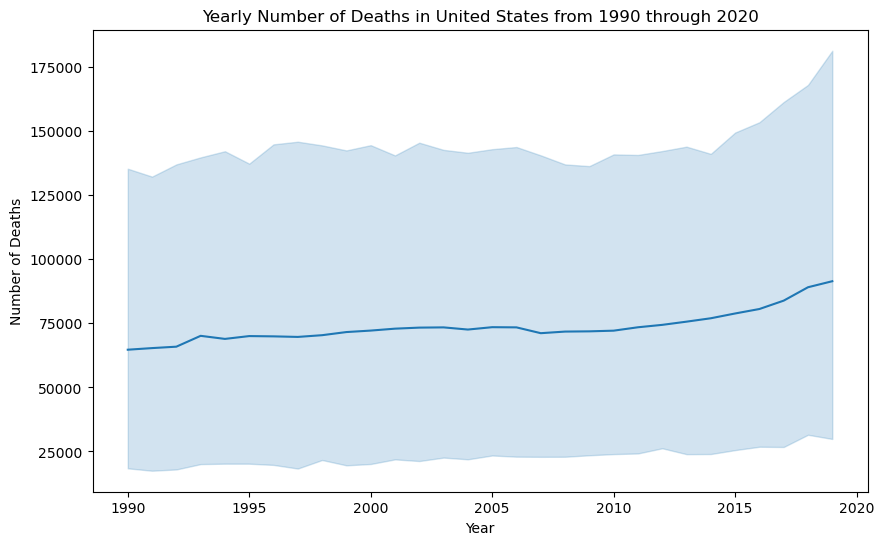

In [ ]:
import matplotlib.ticker as mtick

plt.figure(figsize=(10,6))
plt.title("Yearly Number of Deaths in United States from 1990 through 2020")
plt.ylabel("Number of Deaths")
plt.xlabel("Year")
sns.lineplot(x=us_data['Year'], y=us_data['Total Deaths'])
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
plt.show()

In [ ]:
# Shows us how many people died (in percent) for each year

year_counts=us_data.groupby('Year')['Total Deaths'].sum()
percentages=100*year_counts/year_counts.sum()
print(percentages)

# Inferences show us that as the years went up, so did deaths

Year
1990    2.908630
1991    2.936898
1992    2.961770
1993    3.053503
1994    3.098155
1995    3.147643
1996    3.142708
1997    3.132948
1998    3.163318
1999    3.218171
2000    3.244128
2001    3.277796
2002    3.296100
2003    3.300176
2004    3.262259
2005    3.303648
2006    3.300433
2007    3.298363
2008    3.327417
2009    3.331667
2010    3.343982
2011    3.405345
2012    3.448968
2013    3.506890
2014    3.568359
2015    3.654837
2016    3.735748
2017    3.769454
2018    3.879094
2019    3.981595
Name: Total Deaths, dtype: float64


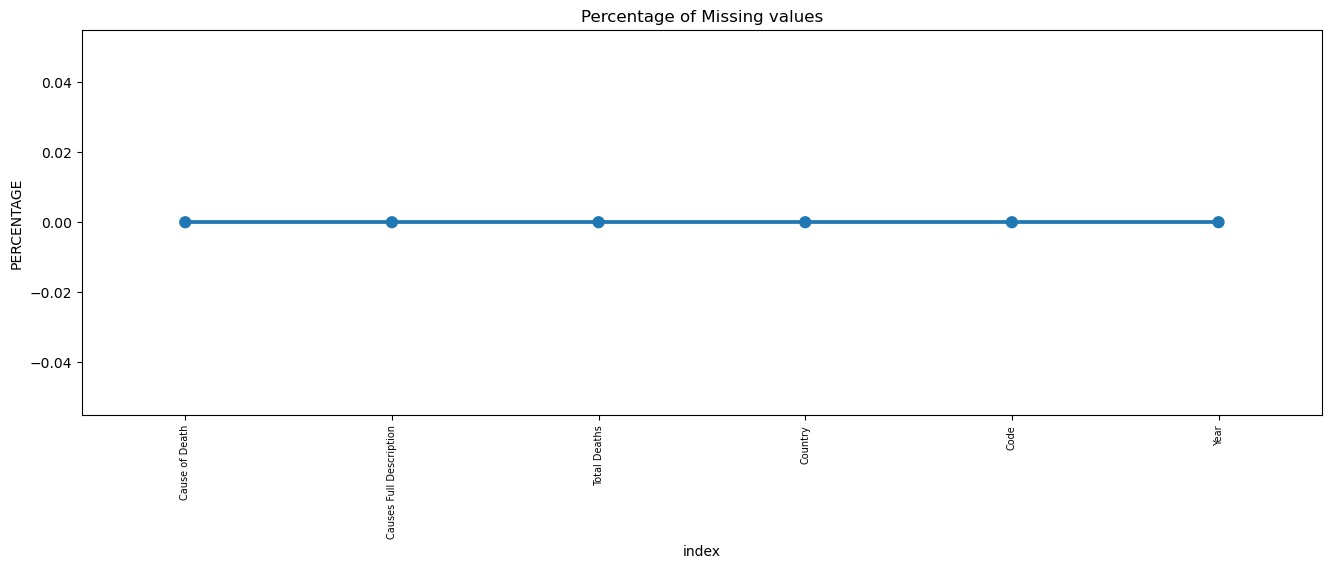

In [ ]:
# Checking to see if there is any missing values in the data or not 

missing = pd.DataFrame((us_data.isnull().sum())*100/us_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation=90,fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()


# Missing data - Initial Intuition
#### We don't have any missing data

In [ ]:
new_us_data = us_data.copy()

In [ ]:
new_us_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 191917 to 192553
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Cause of Death           967 non-null    object 
 1   Causes Full Description  967 non-null    object 
 2   Total Deaths             967 non-null    float64
 3   Country                  967 non-null    object 
 4   Code                     967 non-null    object 
 5   Year                     967 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 52.9+ KB


In [ ]:
# This prints out the highest number of deaths in the dataset
print(us_data['Total Deaths'].max()) 

957455.0


# Checking for Null Values

In [ ]:
# Checks for null values
null_counts = us_data.isnull().sum()
print(null_counts)

Cause of Death             0
Causes Full Description    0
Total Deaths               0
Country                    0
Code                       0
Year                       0
dtype: int64


#### We do not have any Null values, therefore no data cleaning is required

# Findings
##### Through this Exploratory Data Analysis, there were a lot of findings that came through data exploration.

##### One obvious finding is that as the years went up, the amount of deaths slowly rose up and dipped a little bit around 2007-2008 area mark. 

##### Another finding we can take from the graph is the huge upscale of deaths in the 2019 area. By using this, we can investigate more about why it peaked specifically at this year.

##### The most important insight that we can get from this analysis is that the death rate, from 1990 to 2019, increased by almost 1.1% (Be aware that this is only from specific deaths, as the dataset does not include all deaths from all related reasons)